In [1]:
import xarray as xr
from pathlib import Path
import seaborn as sns 
import matplotlib.pyplot as plt

import splitting_isca_data as sid

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
isca_path = Path('/home/links/ct715/data_storage/isca/held-suarez')
isca_exp_list = isca_path.iterdir()

exp_list = sorted(item.name for item in isca_exp_list)
exp_list = [item for item in exp_list if item.startswith('HS')]
exp_list

['HS_T170_100y-nc',
 'HS_T21-land_100y-nc',
 'HS_T21_100y-nc',
 'HS_T42-land_100y-nc',
 'HS_T42_100y-nc',
 'HS_T63-land_100y-nc',
 'HS_T63_100y-nc',
 'HS_T85-land_100y-nc',
 'HS_T85_100y-nc']

In [3]:
datasets = {}
for exp in exp_list:
    
    nc_path = Path(isca_path) / exp
    # nc_files = list(nc_path.glob('*.nc'))
    nc_files = nc_path.glob('*.nc')
    
    ds = xr.open_mfdataset(
        nc_files,
        chunks={'time': 360}
    )
    
    # datasets[exp] = ds.load()
    ds_seasonal = sid.seasonal_mean_datasets(ds)
    datasets[exp] = ds_seasonal

In [4]:
split_full = {
    'set1': slice('2000-12', '2099-09')
}

efp_HS = {}
for key, data in datasets.items():
    
    # split name for var saving
    key_splits = key.split('_')[:2]
    exp_name = f'{key_splits[0]}_{key_splits[1]}'
    
    # calculate EFP for various splits of data
    efp_HS[f'{exp_name}_8sets-99y'] = sid.split_and_process_data(data, split_full)

In [5]:
# reorder dict
efp_HS_reorder = {k: efp_HS[k] for k in ['HS_T21-land_8sets-99y', 'HS_T21_8sets-99y', 'HS_T42-land_8sets-99y', 'HS_T42_8sets-99y', 'HS_T63-land_8sets-99y', 'HS_T63_8sets-99y', 'HS_T85-land_8sets-99y', 'HS_T85_8sets-99y', 'HS_T170_8sets-99y']}
efp_HS = efp_HS_reorder

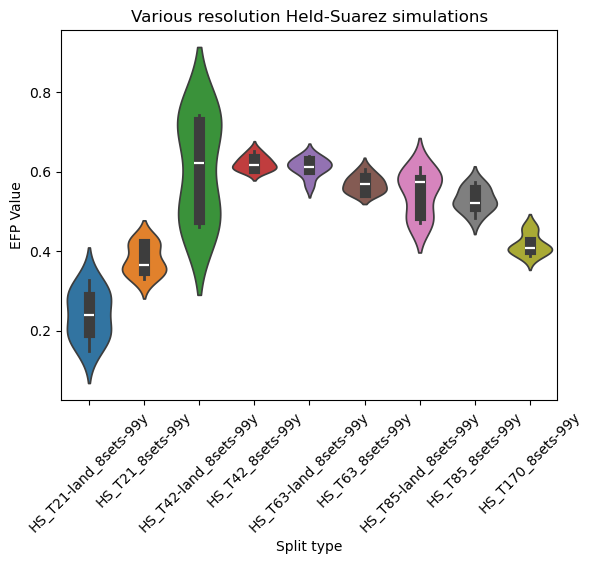

In [6]:
plt.figure()
sns.violinplot(
    data=efp_HS,
    inner_kws=dict(box_width=8, whis_width=2)
)
plt.title('Various resolution Held-Suarez simulations')
plt.xlabel('Split type')
plt.xticks(rotation=45)
plt.ylabel('EFP Value')
plt.show()

## No topography plots

In [7]:
remove_list = ['HS_T21-land_100y-nc', 'HS_T42-land_100y-nc', 'HS_T63-land_100y-nc', 'HS_T85-land_100y-nc']
exp_list_no_land = exp_list
for item in remove_list:
    exp_list_no_land.remove(item)
exp_list_no_land

['HS_T170_100y-nc',
 'HS_T21_100y-nc',
 'HS_T42_100y-nc',
 'HS_T63_100y-nc',
 'HS_T85_100y-nc']

In [8]:
datasets_no_land = {}
for exp in exp_list_no_land:
    
    nc_path = Path(isca_path) / exp
    # nc_files = list(nc_path.glob('*.nc'))
    nc_files = nc_path.glob('*.nc')
    
    ds = xr.open_mfdataset(
        nc_files,
        chunks={'time': 360}
    )
    
    # datasets[exp] = ds.load()
    ds_seasonal = sid.seasonal_mean_datasets(ds)
    datasets_no_land[exp] = ds_seasonal

In [9]:
split_full = {
    'set1': slice('2000-12', '2099-09')
}

efp_HS_no_land = {}
for key, data in datasets_no_land.items():
    
    # split name for var saving
    key_splits = key.split('_')[:2]
    exp_name = f'{key_splits[0]}_{key_splits[1]}'
    
    # calculate EFP for various splits of data
    efp_HS_no_land[f'{exp_name}_8sets-99y'] = sid.split_and_process_data(data, split_full)

In [10]:
# reorder dict
efp_HS_reorder = {k: efp_HS_no_land[k] for k in ['HS_T21_8sets-99y', 'HS_T42_8sets-99y', 'HS_T63_8sets-99y', 'HS_T85_8sets-99y', 'HS_T170_8sets-99y']}
efp_HS_no_land = efp_HS_reorder

/tmp/ipykernel_468648/4256289825.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=0, fontsize=12)


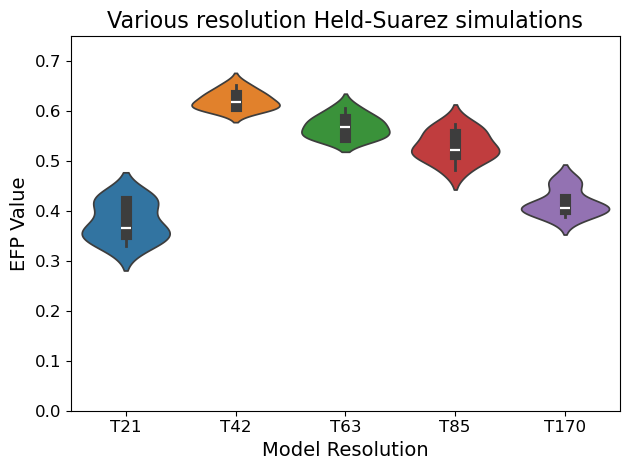

In [11]:
# Define your custom labels
new_labels = ['T21', 'T42', 'T63', 'T85', 'T170']

# Create the plot
plt.figure()
ax = sns.violinplot(
    data=efp_HS_no_land,
    inner_kws=dict(box_width=8, whis_width=2)
)

# Set custom x-axis labels
ax.set_xticklabels(new_labels, rotation=0, fontsize=12)

# Titles and labels
plt.title('Various resolution Held-Suarez simulations', fontsize=16)
plt.xlabel('Model Resolution', fontsize=14)
plt.ylabel('EFP Value', fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 0.75)
plt.tight_layout()
plt.show()


/tmp/ipykernel_468648/1037075652.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=0, fontsize=12)


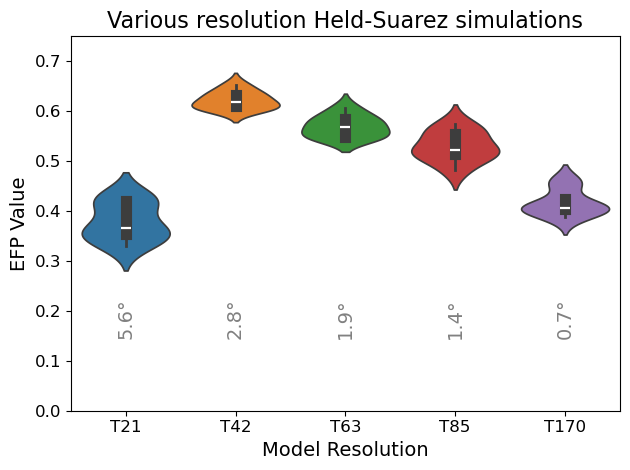

In [12]:
# Define your custom labels and approximate grid spacings
new_labels = ['T21', 'T42', 'T63', 'T85', 'T170']
grid_spacings = ['5.6°', '2.8°', '1.9°', '1.4°', '0.7°']

# Create the plot
plt.figure()
ax = sns.violinplot(
    data=efp_HS_no_land,
    inner_kws=dict(box_width=8, whis_width=2)
)

# Set custom x-axis labels
ax.set_xticklabels(new_labels, rotation=0, fontsize=12)

# Add light grey text annotations for grid spacing
for i, spacing in enumerate(grid_spacings):
    ax.text(
        i,                # x-position (index of label)
        0.3,            # y-position slightly below the x-axis
        spacing,
        ha='center',
        va='top',
        fontsize=14,
        color='grey',
        rotation=90,
        transform=ax.get_xaxis_transform()
    )

# Titles and labels
plt.title('Various resolution Held-Suarez simulations', fontsize=16)
plt.xlabel('Model Resolution', fontsize=14)
plt.ylabel('EFP Value', fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 0.75)
plt.tight_layout()
plt.show()
